# Open Data Japan - Public Holidays 1955 - 2022

# Preamble

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
#sns.set(font="YU Gothic UI") # to display Japanese characters

# Load data

In [5]:
path_data = "../data/processed/odj-data-public_holidays.csv"
df = pd.read_csv(path_data, encoding="UTF-8")

df_d = df.copy()
df_d["DATE_OF_PUBLIC_HOLIDAY"] = pd.to_datetime(df_d["DATE_OF_PUBLIC_HOLIDAY"])

# Sample data processing and analysis

## Initial understanding of data and data cleansing

### First look at the data

We will first take a look at the number of public holidays per year in the raw data.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


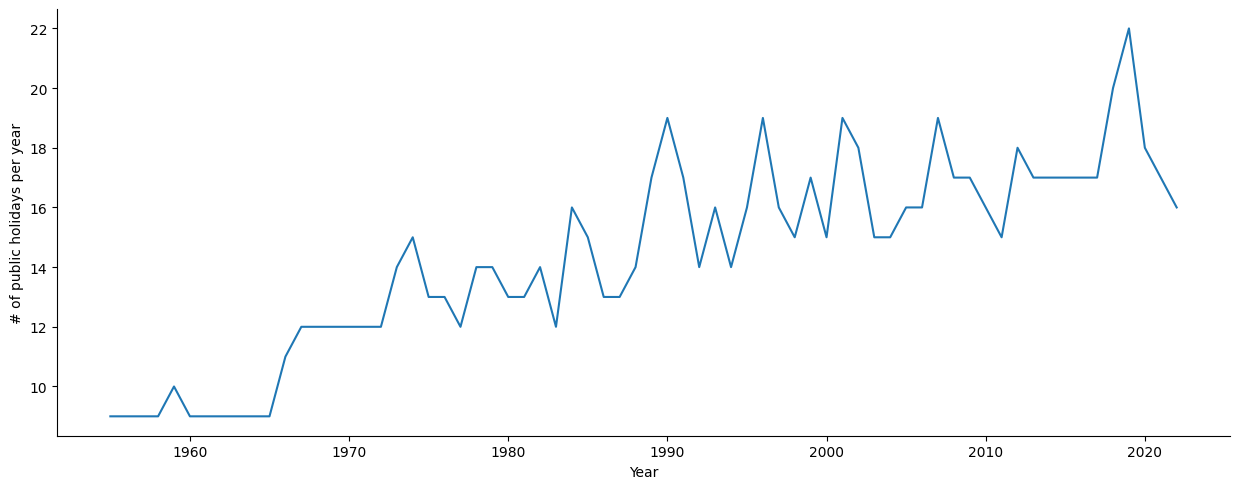

In [6]:
df_01 = pd.DataFrame(df_d.groupby(df_d.DATE_OF_PUBLIC_HOLIDAY.dt.year).count()["NAME_OF_PUBLIC_HOLIDAY_JP"]).reset_index()

ax = sns.relplot(
    data=df_01,
    x="DATE_OF_PUBLIC_HOLIDAY", y="NAME_OF_PUBLIC_HOLIDAY_JP",
    kind="line",
    height=5, aspect=2.5, 
)
ax.set(xlabel='Year', ylabel='# of public holidays per year')

plt.show()

Yearly public holidays seem to have been steadily increasing snice the 1950s - that's great news!   
Naturally we want to confirm this initial understanding and know what these new holidays are.

### Getting a better understanding of what the data means

Let's see what kind of public holidays exist, when they were introduced and how often they occur.

In [84]:
# For each public holiday, find date of first appearance / last appearance / number of occurences and sort by newest
df_d['YEAR'] = df_d.DATE_OF_PUBLIC_HOLIDAY.dt.year
df_d['MONTH'] = df_d.DATE_OF_PUBLIC_HOLIDAY.dt.month_name()

df_s = pd.DataFrame({"First occurence" : df_d.groupby(by='NAME_OF_PUBLIC_HOLIDAY_EN').YEAR.min(), "Last occurence" : df_d.groupby(by='NAME_OF_PUBLIC_HOLIDAY_EN').YEAR.max(), "Number of occurences" : df_d.groupby(by='NAME_OF_PUBLIC_HOLIDAY_EN').YEAR.count()})
df_s.sort_values(by="First occurence", ascending=False)

,First occurence,Last occurence,Number of occurences
NAME_OF_PUBLIC_HOLIDAY_EN,,,
Holiday (National Holiday),2019,2019,2
Mountain Day,2016,2022,7
Shōwa Day,2007,2022,16
Marine Day,1996,2022,27
Enthronement ceremony,1990,1990,1
Funeral service of a Japanese emperor,1989,1989,1
Greenery Day,1989,2022,34
Holiday,1973,2021,104
National Foundation Day,1967,2022,56


We can see that there are about 4 types of national holidays:

1. National holidays that have been in existence since 1955
2. National holidays that were added in 1966/67
3. One-time national holidays related to the imperial family (marriage, change of the Emperor)
4. "Newer" holidays added from time to time after 1989

There is also a category of nondescript "Holidays" that occur with the highest frequency of 104. Taking a look at the site where the original data was published, we see that this data includes substitute national holidays for when a national holiday falls on a Sunday. 

We'll add the above categories to the data and investigate what exactly the generic "Holiday" category is.

In [8]:
categories = {'Holiday (National Holiday)':'Unknown',
'Mountain Day':'Newer holiday',
'Shōwa Day':'Newer holiday',
'Marine Day':'Newer holiday',
'Enthronement ceremony':'Special event',
'Funeral service of a Japanese emperor':'Special event',
'Greenery Day':'Newer holiday',
'Holiday':'Unknown',
'National Foundation Day':'60s holiday',
'Respect-for-the-Aged Day':'60s holiday',
'Health and Sports Day':'60s holiday',
'Imperial marriage ceremony':'Special event',
"New Year's day":'50s holiday',
'Autumnal Equinox Day':'50s holiday',
'Labour Thanksgiving Day':'50s holiday',
"Children's Day":'50s holiday',
"Emperor's Birthday":'50s holiday',
'Culture Day':'50s holiday',
'Constitution Memorial Day':'50s holiday',
'Coming of Age Day':'50s holiday',
'Vernal Equinox Day':'50s holiday'}

# Add day of week information, 0=Monday
df_d['DOW'] = df_d['DATE_OF_PUBLIC_HOLIDAY'].dt.dayofweek
# Add category
df_d['HOLIDAY_CATEGORY'] = df_d['NAME_OF_PUBLIC_HOLIDAY_EN'].map(categories)

array([[<Axes: title={'center': '50s holiday'}>,
        <Axes: title={'center': '60s holiday'}>],
       [<Axes: title={'center': 'Newer holiday'}>,
        <Axes: title={'center': 'Special event'}>],
       [<Axes: title={'center': 'Unknown'}>, <Axes: >]], dtype=object)

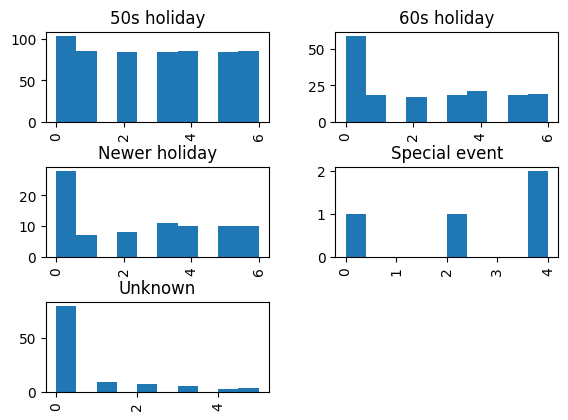

In [9]:
# Let's also check what weekday 'Unknown' fall onto
df_d.hist('DOW', by='HOLIDAY_CATEGORY')

We see that in most cases it is a Monday - a replacement for a Sunday public holiday
Let's compare public holidays on Sunday and Monday in each year - the number on Monday should be
equal or greater than the number on Sunday if our replacement day theory is correct

In [10]:
df_s2 = pd.DataFrame({'Mondays' : df_d.query('DOW == 0').groupby(by='YEAR').DOW.count(), 'Sundays' : df_d.query('DOW == 6').groupby(by='YEAR').DOW.count()})
df_s2.fillna(0).query('Sundays > Mondays')

,Mondays,Sundays
YEAR,,
1956,0.0,4.0
1960,0.0,1.0
1961,0.0,2.0
1963,1.0,2.0
1967,0.0,3.0
1971,1.0,2.0


We see that after 1971, we get the expected relationships between the number of public holidays on Mondays and Sundays. A quick google search reveals that the Japanese law was amended in 1973 to allow for public holidays to have a replacement day on Monday should the public holiday fall on a Sunday (see e.g. https://ja.wikipedia.org/wiki/%E6%8C%AF%E6%9B%BF%E4%BC%91%E6%97%A5).

We're now ready to better explore how much free time public holidays have generated over the years.

## Basic analysis

Here are some basic questions we may want to answer from this data:

* How many days off do public holidays generate each year?
* What months get the most days off?
* What is the chance of a public holday being on a Monday or Friday (long weekend) vs mid-week?
* What are the chances of getting 4 consecutive days off?

### How many days off do public holidays generate each year?

First, after building an understanding of the data let's review how many public holidays are assigned to each year. After that we can take a look at how many days off that actually generated.

[Text(0.5, 0, 'Year'), Text(0, 0.5, '# of public holidays available')]

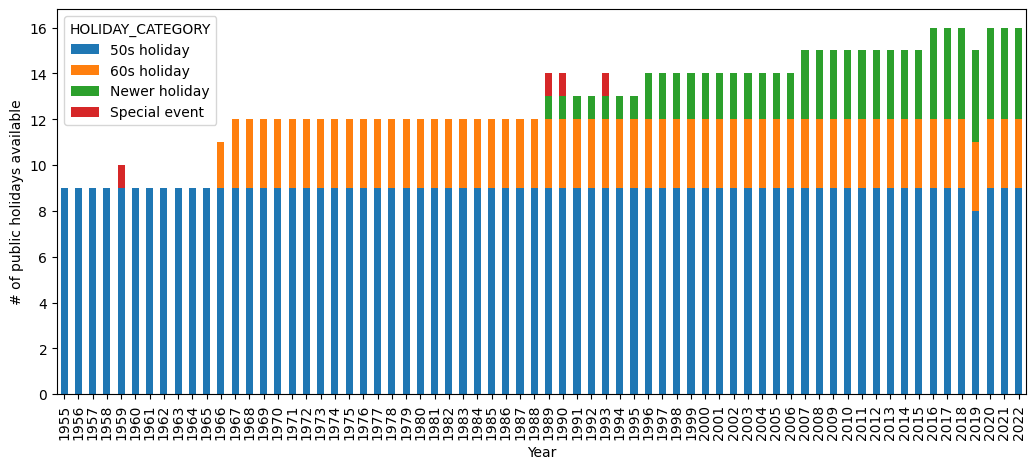

In [61]:
# We ignore replacement days and just look at how many public holidays are designated in the first place
df_02 = pd.DataFrame(df_d.query("(HOLIDAY_CATEGORY != 'Unknown')").groupby(['YEAR', 'HOLIDAY_CATEGORY']).count()["NAME_OF_PUBLIC_HOLIDAY_JP"])
ax = df_02.reset_index().pivot_table('NAME_OF_PUBLIC_HOLIDAY_JP', 'YEAR', 'HOLIDAY_CATEGORY').fillna(0).plot(kind='bar', stacked=True, figsize=(12.5,5))

ax.set(xlabel='Year', ylabel='# of public holidays available')

As we've already seen above, public holidays are steadily increasing due to the addition of new holidays in the 60s and end of the 80s onward. 
But what if a public holiday falls on a Saturday or Sunday? Replacement holidays exist only for Sundays and only since the 1970s. How many days do we actually get off?

(*By the way, the public holiday that's missing in 2019 is the emperor's birthday as the old emperor abdicated before his birthday but after his successor's birthday.*)

[Text(0.5, 0, 'Year'), Text(0, 0.5, '# of days off')]

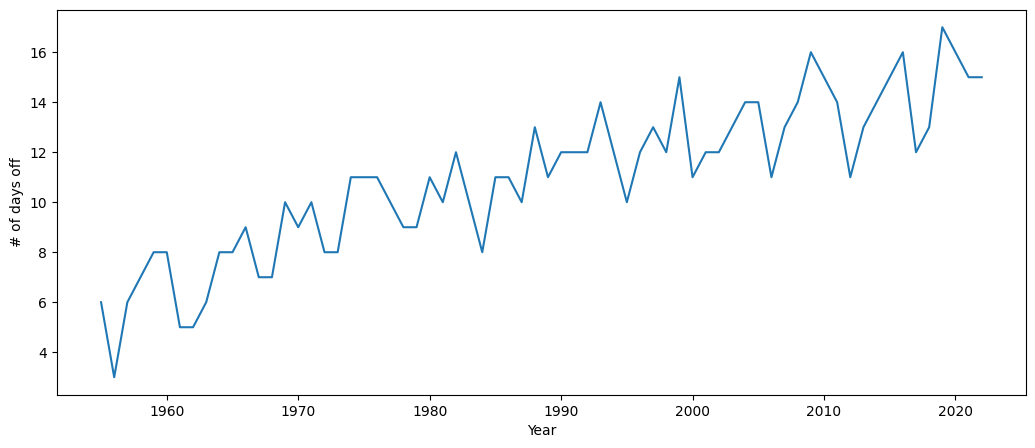

In [72]:
# Ignore public holiday's on Saturdays and Sundays - these are already off for most workers
ax = df_d.query("DOW != 5 & DOW != 6").groupby(['YEAR']).count().DATE_OF_PUBLIC_HOLIDAY.plot(figsize=(12.5,5))
ax.set(xlabel='Year', ylabel='# of days off')

We can see that the number of days off has increased significantly over the last few decades. That's great!

The zig-zaggy nature of the line is caused by some public holidays still falling on Saturdays without a replacement holiday. This happens somewhere between 1 and 4 times per year with a cycle of about 3-4 years (an opportunity to further improve the law!):

[Text(0.5, 0, 'Year'), Text(0, 0.5, '# of public holidays on a Saturday')]

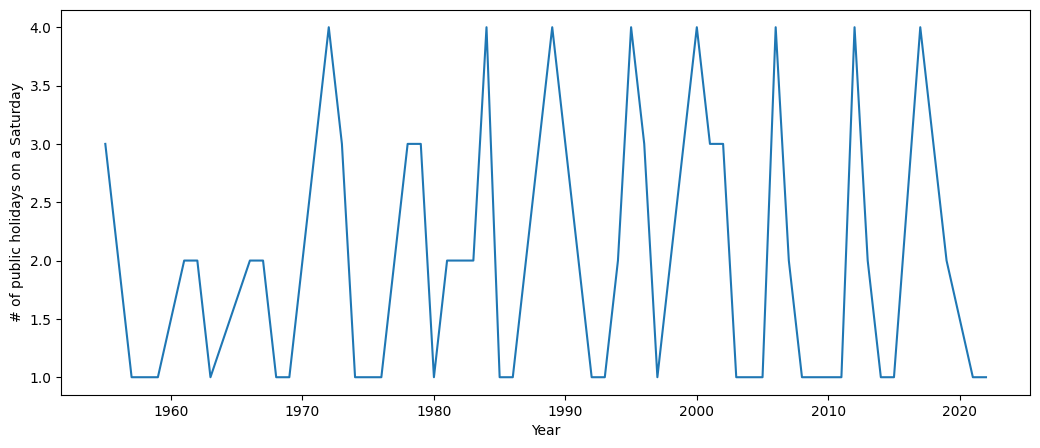

In [79]:
ax = df_d.query("DOW == 5").groupby(['YEAR']).count().DATE_OF_PUBLIC_HOLIDAY.plot(figsize=(12.5,5))
ax.set(xlabel='Year', ylabel='# of public holidays on a Saturday')

### What months get the most days off?

We'll just look at the last 10 years to get an idea of what months are best in terms of the number of public holidays:

/var/tmp/ipykernel_3552/4288532753.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45)


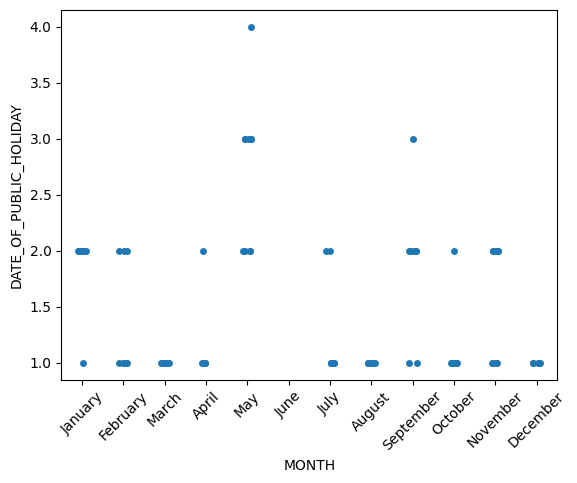

In [116]:
#df_d.query('(YEAR > 2011) & DOW != 5 & DOW != 6').groupby(by=['YEAR', 'MONTH']).count().DATE_OF_PUBLIC_HOLIDAY.reset_index().boxplot(by='MONTH', column='DATE_OF_PUBLIC_HOLIDAY', order=['a'])
df_s3 = df_d.query('(YEAR > 2011) & DOW != 5 & DOW != 6').groupby(by=['YEAR', 'MONTH']).count().DATE_OF_PUBLIC_HOLIDAY.reset_index()

chart = sns.stripplot(x='MONTH', data=df_s3, y='DATE_OF_PUBLIC_HOLIDAY', order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
pass

While most months gIt seems like May and September are generally best and June is worst! May is of course where 'Golden Week' happens.